In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../data/film.csv') #读取csv数据
df.head()  #展示前五行数据

,filmnum,filmsize,ratio,quality
0,45,106,17,6
1,44,99,15,18
2,61,149,27,10
3,41,97,27,16
4,54,148,30,8


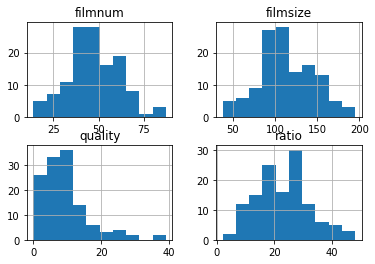

In [3]:
#plt.figure(figsize=(15,8))  #设置图片尺寸
df.hist() #绘制直方图
plt.show()

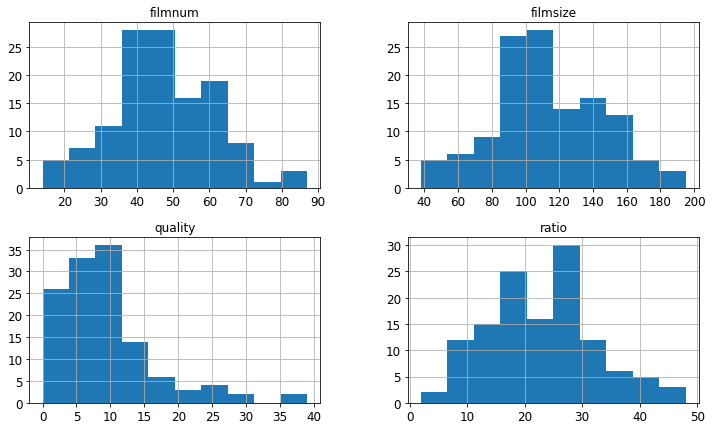

In [4]:
df.hist(xlabelsize=12,ylabelsize=12,figsize=(12,7))  #调整直方图尺寸
plt.show()

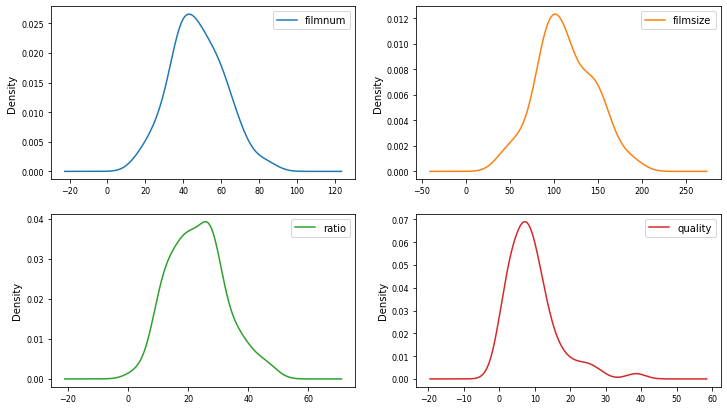

In [5]:
#绘制密度图
df.plot(kind='density', subplots=True, layout=(2,2), sharex=False,fontsize=8,figsize=(12,7))
plt.show()

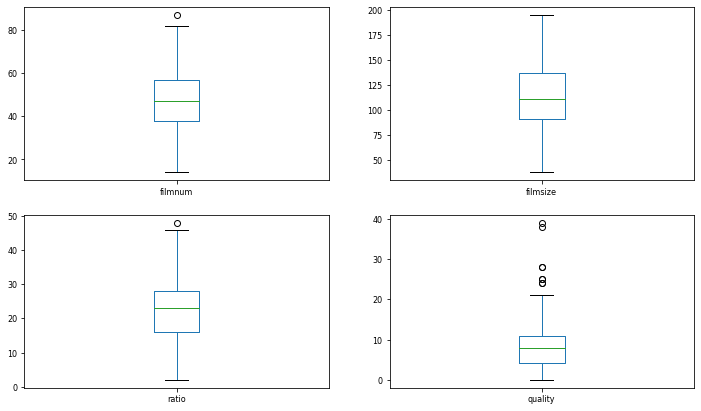

In [6]:
#绘制箱线图
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, fontsize=8,figsize=(12,7))
plt.show()

In [7]:
names = ['filmnum','filmsize','ratio','quality'] #设置变量名

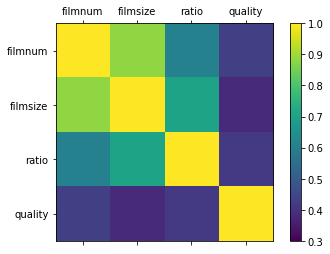

In [8]:
correlations = df.corr()  #计算变量之间的相关系数矩阵
# 绘制相关系数热力图
fig = plt.figure() #调用figure创建一个绘图对象
ax = fig.add_subplot(111) # 调用画板绘制第一个子图
cax = ax.matshow(correlations, vmin=0.3, vmax=1)  #绘制热力图，从0.3到1
fig.colorbar(cax)  #将matshow生成热力图设置为颜色渐变条
ticks = np.arange(0,4,1) #生成0-4，步长为1
ax.set_xticks(ticks)  #生成刻度
ax.set_yticks(ticks)
ax.set_xticklabels(names) #生成x轴标签
ax.set_yticklabels(names)
plt.show()

In [9]:
correlations  #相关系数矩阵

,filmnum,filmsize,ratio,quality
filmnum,1.000000,0.883480,0.607899,0.433402
filmsize,0.883480,1.000000,0.706425,0.383146
ratio,0.607899,0.706425,1.000000,0.419036
quality,0.433402,0.383146,0.419036,1.000000


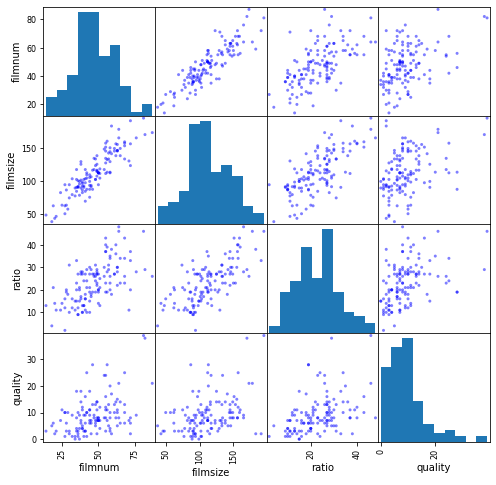

In [10]:
scatter_matrix(df,figsize=(8,8), c='b')  #绘制散点图
plt.show()

In [11]:
x = df.iloc[:,1:4]  #选取data中的RM变量
y =df.filmnum  #设定target为y

In [12]:
y.head()

0    45
1    44
2    61
3    41
4    54
Name: filmnum, dtype: int64

In [13]:
# 把x、y转化为数组形式，以便于计算
x = np.array(x.values)  
y = np.array(y.values) 
#以25%的数据构建测试样本，剩余作为训练样本
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state =1)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((94, 3), (32, 3), (94,), (32,))

In [15]:
lr=LinearRegression()  #设定回归算法
lr.fit(x_train,y_train) #使用训练数据进行参数求解

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print('求解截距项为：',lr.intercept_)
print('求解系数为：',lr.coef_)

求解截距项为： 4.353106493779016
求解系数为： [ 0.37048549 -0.03831678  0.23046921]


In [17]:
y_hat = lr.predict(x_test) #对测试集的预测
y_hat[0:9]  #打印前10个预测值

array([20.20848598, 74.31231952, 66.97828797, 50.61650336, 50.53930128,
       44.72762082, 57.00320531, 35.55222669, 58.49953514])

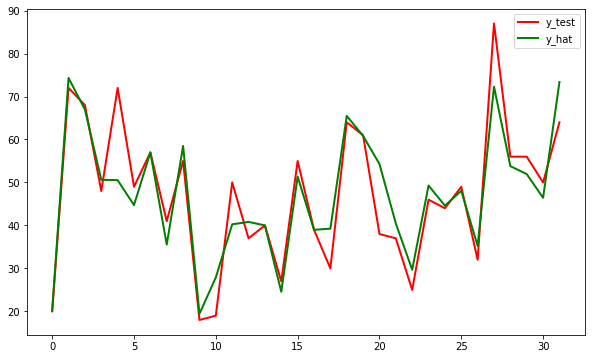

In [18]:
plt.figure(figsize=(10,6))  #设置图片尺寸
t = np.arange(len(x_test))  #创建t变量
#绘制y_test曲线
plt.plot(t, y_test, 'r', linewidth=2, label='y_test') 
#绘制y_test曲线
plt.plot(t, y_hat, 'g', linewidth=2, label='y_hat') 
plt.legend() #设置图例
plt.show()

In [19]:
# 拟合优度R2的输出方法一
print("r2:",lr.score(x_test, y_test))
# 拟合优度R2的输出方法二
print("r2_score:",r2_score(y_test, y_hat)) 
# 用scikit-learn计算MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_hat))
# 用scikit-learn计算MSE
print("MSE:", metrics.mean_squared_error(y_test, y_hat))
# # 用scikit-learn计算RMSE
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

r2: 0.8279404383777595
r2_score: 0.8279404383777595
MAE: 4.63125112009528
MSE: 46.63822281456598
RMSE: 6.8292183165107545
